In [48]:
%reset
# import get_marked2pt as m2pt
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import os
# import camb
# import LSS_funcs as ghmf
# import general_funcs as gnf
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import dill
import sys, os
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/cosmosis'
df_name = '/global/cfs/cdirs/des/shivamp/cosmosis/ACTxDESY3/src/results/DV_obj_temp_gty_plancky3_beamed.pk'

DV = dill.load(open(df_name,'rb'))




In [92]:
DV.fftcovtot_dict.keys()


dict_keys(['kk_kk', 'kk_ky', 'kk_yy', 'gty_gty', 'ky_ky', 'ky_yy', 'yy_yy'])

In [93]:
DV.fftcovtot_dict['gty_gty'].keys()



dict_keys(['bin_1_0_1_0', 'theta', 'bin_1_0_2_0', 'bin_1_0_3_0', 'bin_1_0_4_0', 'bin_2_0_1_0', 'bin_2_0_2_0', 'bin_2_0_3_0', 'bin_2_0_4_0', 'bin_3_0_1_0', 'bin_3_0_2_0', 'bin_3_0_3_0', 'bin_3_0_4_0', 'bin_4_0_1_0', 'bin_4_0_2_0', 'bin_4_0_3_0', 'bin_4_0_4_0', 'bins_comb'])

In [94]:
ind_th_sel = np.where( (DV.fftcovtot_dict['ky_ky']['theta'] > 2.5) & (DV.fftcovtot_dict['ky_ky']['theta'] < 250.0))[0]

DV.fftcovtot_dict['ky_ky']['theta'][ind_th_sel]



array([  2.7323496 ,   3.43979508,   4.33040859,   5.45161502,
         6.86311829,   8.64008049,  10.87712434,  13.69337171,
        17.23878693,  21.70216227,  27.32117108,  34.39502388,
        43.30040114,  54.51151148,  68.62534309,  86.39345315,
       108.76198809, 136.92206553, 172.37320095, 217.00315644])

In [95]:
(DV.fftcovtot_dict['ky_ky']['bin_1_0_1_0'][ind_th_sel,:][:,ind_th_sel]).shape



(20, 20)

In [96]:
DV.Cl_result_dict['ky']['bin_3_0']['2h']


array([2.57198548e-012, 2.57198524e-012, 2.57198494e-012, 2.57198456e-012,
       2.57198407e-012, 2.57198345e-012, 2.57198267e-012, 2.57198167e-012,
       2.57198039e-012, 2.57197874e-012, 2.57197661e-012, 2.57197385e-012,
       2.57197024e-012, 2.57196548e-012, 2.57195915e-012, 2.57195067e-012,
       2.57193915e-012, 2.57192336e-012, 2.57190142e-012, 2.57187055e-012,
       2.57182649e-012, 2.57176277e-012, 2.57166966e-012, 2.57153306e-012,
       2.57133273e-012, 2.57103822e-012, 2.57060513e-012, 2.56991207e-012,
       2.56902340e-012, 2.56777141e-012, 2.56599048e-012, 2.56342923e-012,
       2.55970473e-012, 2.55456216e-012, 2.54711131e-012, 2.53702116e-012,
       2.52398769e-012, 2.50662890e-012, 2.48440428e-012, 2.45639058e-012,
       2.42156268e-012, 2.37887230e-012, 2.32716643e-012, 2.26517980e-012,
       2.19158094e-012, 2.10507117e-012, 2.00453669e-012, 1.88926064e-012,
       1.75906432e-012, 1.61449213e-012, 1.45719870e-012, 1.29026811e-012,
       1.11801827e-012, 9

In [97]:
cov_gty_gty = np.zeros((80,80))

for j1 in range(4):
    for j2 in range(4):
        cov_gty_gty[20*j1:20*(j1+1),20*j2:20*(j2+1)] = DV.fftcovtot_dict['gty_gty']['bin_' + str(j1+1) + '_0_' + str(j2+1) + '_0'][ind_th_sel,:][:,ind_th_sel]   



In [98]:
cov_ky_ky = np.zeros((80,80))

for j1 in range(4):
    for j2 in range(4):
        cov_ky_ky[20*j1:20*(j1+1),20*j2:20*(j2+1)] = DV.fftcovtot_dict['ky_ky']['bin_' + str(j1+1) + '_0_' + str(j2+1) + '_0'][ind_th_sel,:][:,ind_th_sel]   




In [99]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr



Text(0.5, 1, '$\\mathcal{C}(\\langle \\gamma_t y \\rangle, \\langle \\gamma_t y \\rangle)$')

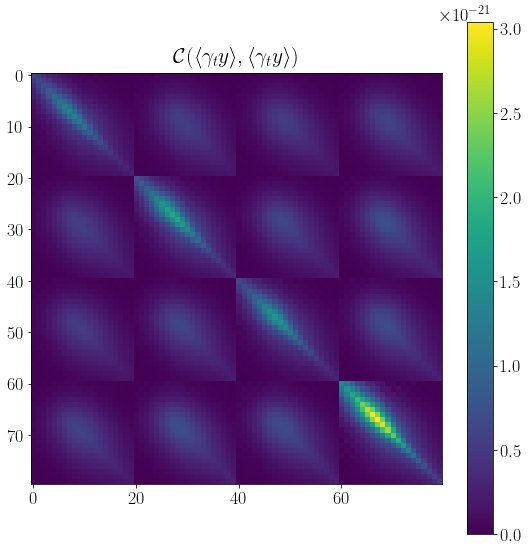

In [100]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))


# corr = ax.imshow(((get_corr(cov_gty_gty))), clim=(-1.0, 1.0))
# fig.colorbar(corr, ax=ax)
# fig.tight_layout()

# fig.savefig(save_dir_gg_gm + 'gg_gm_3d_corr_mat_lin_v2_njk' + str(njk) + '.png')

# plt.close()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

corr = ax.imshow((((cov_gty_gty))))
fig.colorbar(corr, ax=ax)
fig.tight_layout()
ax.set_title(r'$\mathcal{C}(\langle \gamma_t y \rangle, \langle \gamma_t y \rangle)$')
# fig.savefig(save_dir_gg_gm + 'gg_mm__gm_mm_3d_corr_mat_lin_v2_njk' + str(njk) + '.png')

# plt.close()





Text(0.5, 1, '$\\mathcal{C}(\\langle \\kappa y \\rangle, \\langle \\kappa y \\rangle)$')

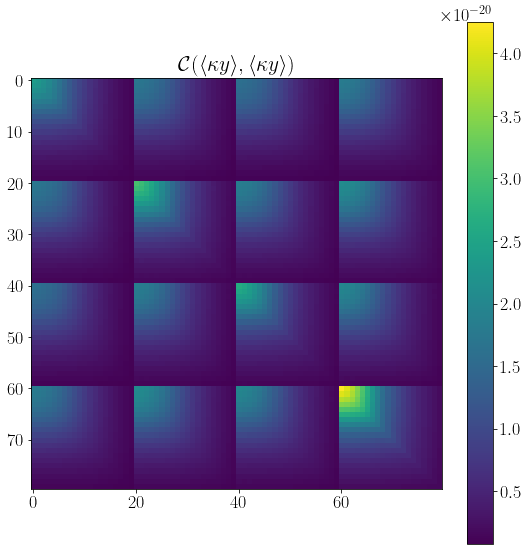

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

corr = ax.imshow((((cov_ky_ky))))
fig.colorbar(corr, ax=ax)
fig.tight_layout()
ax.set_title(r'$\mathcal{C}(\langle \kappa y \rangle, \langle \kappa y \rangle)$')



In [46]:
corr_gty_gty = get_corr(cov_gty_gty)



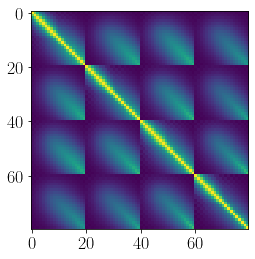

In [47]:
plt.figure()
plt.imshow(corr_gty_gty)
plt.show()

